In [1]:
# MNSIT Labels to Image ANN
# Abraham Oliver, 2016

# General structure from tensorflow.org
# Matplotlib help from http://tneal.org/post/tensorflow-ipython/TensorFlowMNIST/

In [2]:
# Import Tensorflow
import tensorflow as tf

In [3]:
# Initiate Session
sess = tf.InteractiveSession()

In [4]:
# Retrieve dataset
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
# Import MNIST dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
# Import python3's print as a function
from __future__ import print_function

In [7]:
# Import numpy
import numpy as np

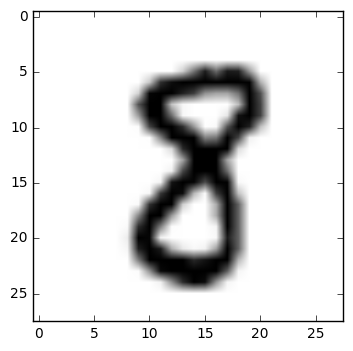

In [8]:
# Import tools for image visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

def showImage(img):
    """Display image of recovered digit"""
    tmp = img.reshape((28,28))
    plt.imshow(tmp, cmap = cm.Greys)
    plt.show()

# Test showImage on an image from the dataset
showImage(mnist.train.images[24601])

In [9]:
# Design model variables

# Input
x = tf.placeholder(tf.float32, [None, 10])
# Weights
W = tf.Variable(tf.zeros([10, 784]))
# Biases
b = tf.Variable(tf.zeros([784]))
# Predicted Output
y = tf.nn.softmax(tf.matmul(x, W) + b)
# Correct Outputs
y_ = tf.placeholder(tf.float32, [None, 784])

In [10]:
# Training with cross-entropy cost and gradient descent with learning rate .5
loss = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.ProximalGradientDescentOptimizer(0.5).minimize(loss)

In [11]:
# Initialize variables
sess.run(tf.initialize_all_variables())

In [12]:
# Train over data
for i in range(2000):
    # Labels are the inputs and images are the outputs
    batch_ys, batch_xs = mnist.train.next_batch(200)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [13]:
def calcAccuracy(margin = .005):
    """Calculate the accuracy of the model with test data"""
    diff = tf.abs(tf.sub(y, y_))
    corrects = tf.cast(tf.less_equal(diff, margin), tf.float32)
    accuracy = tf.reduce_mean(corrects)
    print(sess.run(accuracy, feed_dict={x: mnist.test.labels, y_: mnist.test.images}))

# Calculate accuracy of the model
calcAccuracy()

0.794018


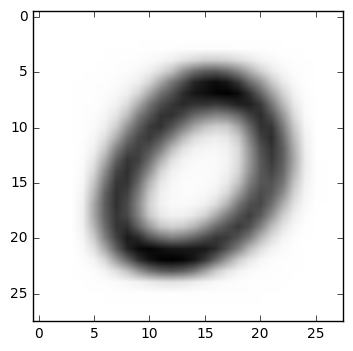

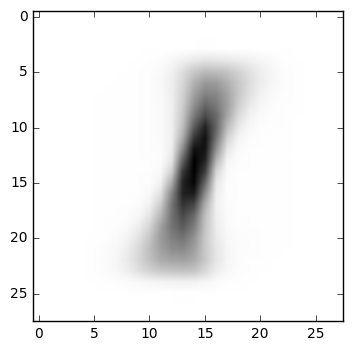

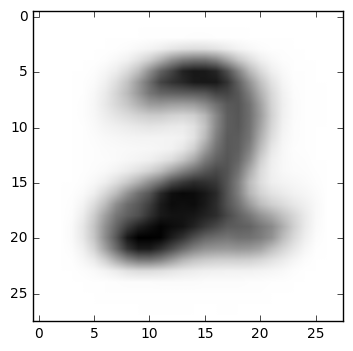

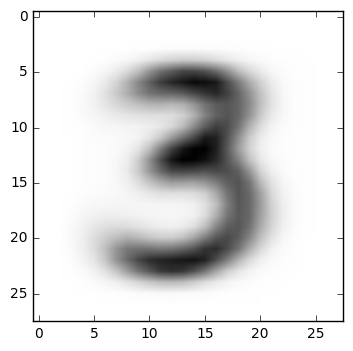

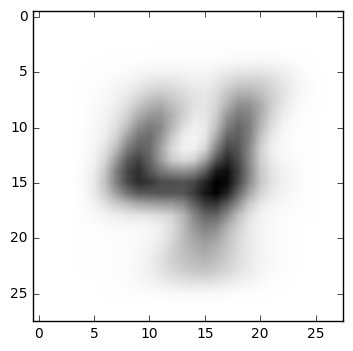

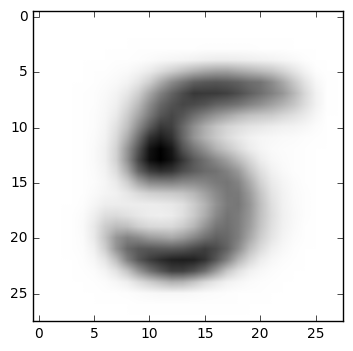

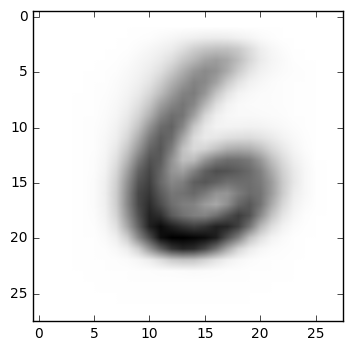

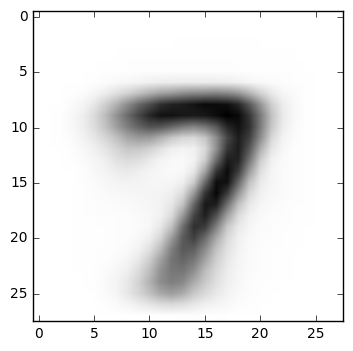

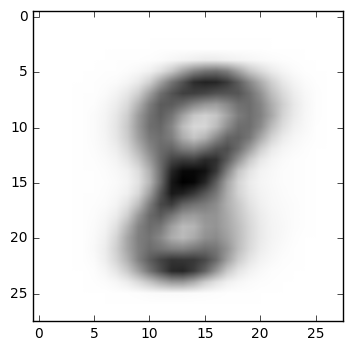

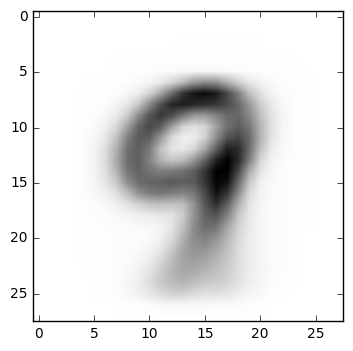

In [14]:
def compute(INPUT):
    """Shows the network's output image from a label vector input"""
    i = np.array([INPUT])
    z = y.eval(feed_dict = {x: i})
    showImage(z[0])

# Show image from each digit
for i in range(10):
    # Make label vector for digit
    lv = np.zeros(10)
    lv[i] = 1.0
    compute(lv)

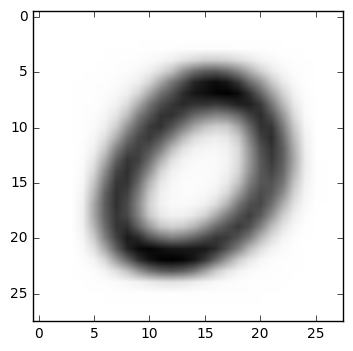

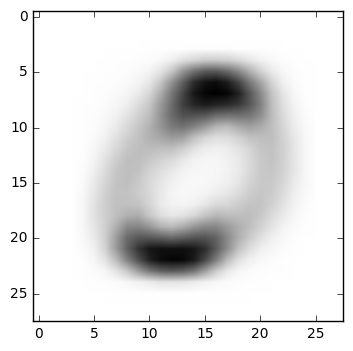

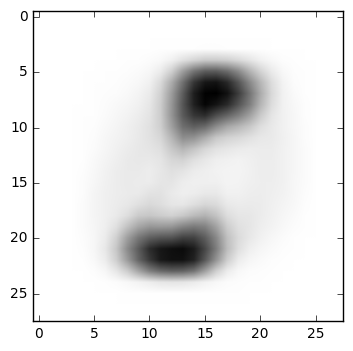

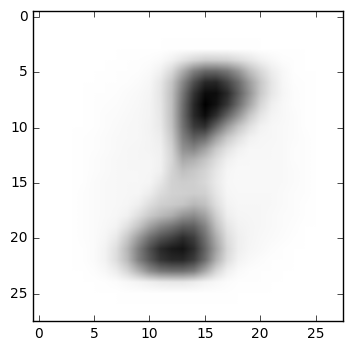

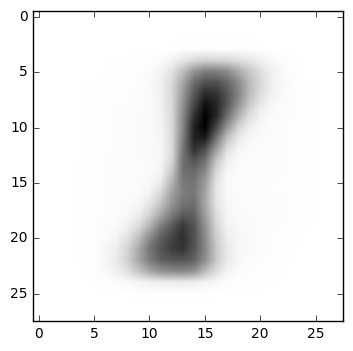

In [15]:
# Create morphing digit
def morphBetween(d1, d2, interval = 5):
    """Morph image from d1 to d2 in 'interval' steps"""
    for i in range(interval):
        lv = np.zeros(10)
        lv[d1] = 1 - (float(i) / interval)
        lv[d2] = float(i) / interval
        compute(lv)

# Test
morphBetween(0, 1)